In [8]:
import pandas as pd
import re
# import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the dataset
df = pd.read_csv('../data/cleaned.csv')

# Select relevant columns
df = df[['title', 'text', 'Type']]

In [10]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer

# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

In [11]:
# Convert labels to binary (1 for 'true', 0 for 'fake')
df['label'] = df['Type'].apply(lambda x: 0 if x == 'Fake' else 1)

# Extract features and labels
X_text = df['text']
y = df['label'].values

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['text'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384128    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 392449 (1.50 MB)
Trainable params: 392449 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training accuracy

In [28]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=1
)

Epoch 1/10


2024-12-15 01:10:46.951798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - ETA: 0s - loss: 0.1132 - accuracy: 0.9680

2024-12-15 01:10:52.425134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - 6s 6ms/step - loss: 0.1132 - accuracy: 0.9680 - val_loss: 0.0441 - val_accuracy: 0.9914
Epoch 2/10
898/898 [==============================] - 4s 5ms/step - loss: 0.0399 - accuracy: 0.9918 - val_loss: 0.0398 - val_accuracy: 0.9921
Epoch 3/10
898/898 [==============================] - 4s 5ms/step - loss: 0.0304 - accuracy: 0.9930 - val_loss: 0.0480 - val_accuracy: 0.9905
Epoch 4/10
898/898 [==============================] - 4s 5ms/step - loss: 0.0234 - accuracy: 0.9945 - val_loss: 0.0455 - val_accuracy: 0.9921
Epoch 5/10
898/898 [==============================] - 5s 5ms/step - loss: 0.0239 - accuracy: 0.9951 - val_loss: 0.0507 - val_accuracy: 0.9915
Epoch 6/10
898/898 [==============================] - 4s 5ms/step - loss: 0.0265 - accuracy: 0.9944 - val_loss: 0.0428 - val_accuracy: 0.9918
Epoch 7/10
898/898 [==============================] - 5s 5ms/step - loss: 0.0164 - accuracy: 0.9961 - val_loss: 0.0453 - val_accuracy: 0.9915
Epoch 8/10
898/89

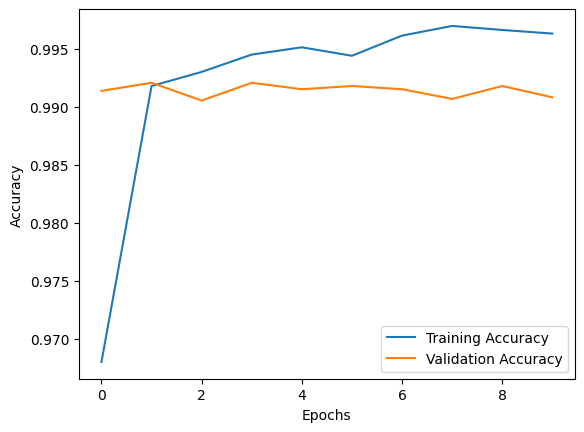

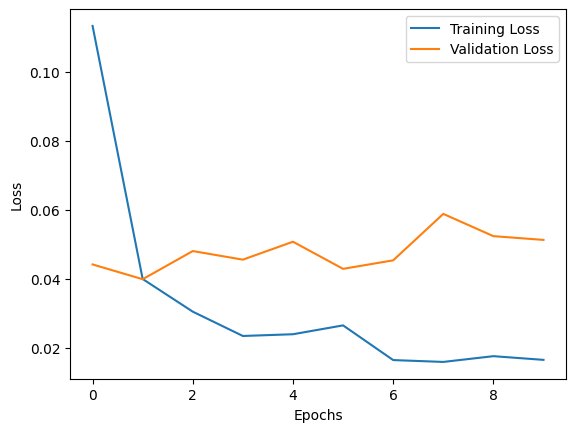

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test accuracy

In [51]:
# Train the model
history = model.fit(
    X_test, y_test,
    epochs=10,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=1
)

Epoch 1/10
225/225 [==============================] - 2s 9ms/step - loss: 0.0656 - accuracy: 0.9876 - val_loss: 0.0512 - val_accuracy: 0.9916
Epoch 2/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0274 - accuracy: 0.9943 - val_loss: 0.0480 - val_accuracy: 0.9939
Epoch 3/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0181 - accuracy: 0.9958 - val_loss: 0.0519 - val_accuracy: 0.9939
Epoch 4/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0504 - val_accuracy: 0.9944
Epoch 5/10
225/225 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0516 - val_accuracy: 0.9939
Epoch 6/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.0588 - val_accuracy: 0.9939
Epoch 7/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0592 - val_accuracy: 0.9933
Epoch 

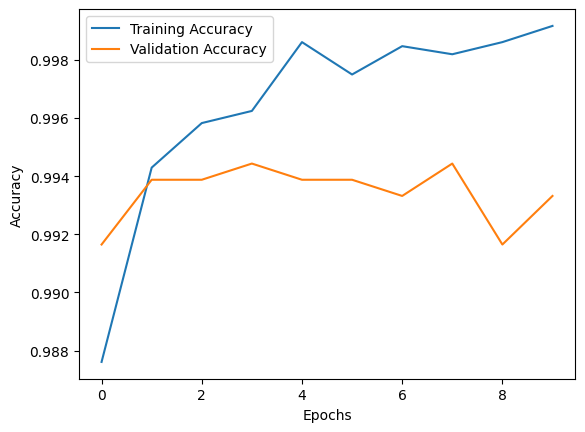

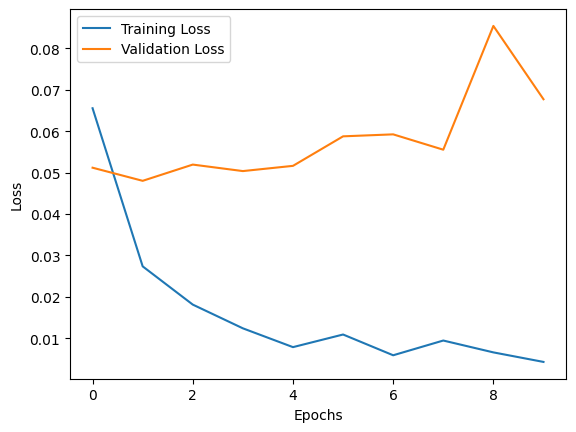

In [52]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:

df_1 = pd.read_csv('../data/evaluation.csv', sep=';')
df_2 = pd.read_csv('../data/test.csv', sep=';')
df_3 = pd.read_csv('../data/train.csv', sep=';')

new_df = pd.concat([df_1, df_2, df_3], ignore_index=True)
new_df.head()

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0


In [47]:
new_df.head()
new_y = np.array(new_df['label'])

In [48]:
# # Fit the vectorizer and transform the cleaned text
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(new_df['text']).toarray()

# # Get the feature names to understand what words are included
feature_names = vectorizer.get_feature_names_out()

print(X.shape)

(40587, 3000)


## Accuracy on unseen dataset

In [49]:
X, _, y, _ = train_test_split(X, new_y, test_size=0.01, random_state=42)
print(X.shape)
print(y.shape)

# Predict probabilities
predictions = model.predict(X)  # Use sparse matrix directly if your model supports it

# Convert probabilities to binary labels (1 for 'true', 0 for 'fake')
predicted_labels = (predictions >= 0.5).astype(int)

(40181, 3000)
(40181,)
1256/1256 [==============================] - 2s 1ms/step


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y, predicted_labels, target_names=['Fake News', 'True News']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, predicted_labels))

Accuracy: 0.46

Classification Report:
              precision    recall  f1-score   support

   Fake News       0.45      0.76      0.56     18468
   True News       0.49      0.20      0.28     21713

    accuracy                           0.46     40181
   macro avg       0.47      0.48      0.42     40181
weighted avg       0.47      0.46      0.41     40181


Confusion Matrix:
[[14031  4437]
 [17392  4321]]
